# PERSONALITY TRAIT ANALYSIS USING BFI-2-S QUESTIONAIRRE

#### Importing Utilities

In [92]:
import numpy as np
import pandas as pd
import math
import ipdb
import sys
from tabulate import tabulate
from copy import deepcopy
import matplotlib.pyplot as plt
from numpy import log2 as log
eps = np.finfo(float).eps
from sklearn.metrics import accuracy_score

#### Reading data from CSV file

In [93]:
data_iiit = pd.read_csv("../input_data/Data_IIIT.csv")
data_other_colleges = pd.read_csv("../input_data/Data_Other_Colleges.csv")

In [94]:
# data_iiit.shape

In [95]:
# data_other_colleges.shape

#### Renaming the columns of the dataset

In [96]:
data_other_colleges.columns = ['timestamp','email_id','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','gender','dob','tob','place_ob','zodiac_input','name']

In [97]:
data_iiit.columns = ['timestamp','email_id','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','gender','dob','tob','place_ob','zodiac_input','name']

#### Concatenating the dataframes together

In [100]:
data = pd.concat([data_iiit,data_other_colleges])

In [101]:
data = data.reset_index(drop=True)

In [102]:
# data

#### This function assigns the zodiac to the data according to the Date Of Birth

In [103]:
def calculate_zodiac(data):
    import datetime
    data['zodiac_calc']="none"
    for i in range(data.shape[0]):
        a=data['dob'][i]
        datee = datetime.datetime.strptime(a, "%Y-%m-%d")
        month=datee.month
        day=datee.day
        astro_sign='none'
        if month == 12: 
            astro_sign = 'sagittarius' if (day < 22) else 'capricorn'

        elif month == 1: 
            astro_sign = 'capricorn' if (day < 20) else 'aquarius'

        elif month == 2: 
            astro_sign = 'aquarius' if (day < 19) else 'pisces'

        elif month == 3: 
            astro_sign = 'pisces' if (day < 21) else 'aries'

        elif month == 4: 
            astro_sign = 'aries' if (day < 20) else 'taurus'

        elif month == 5: 
            astro_sign = 'taurus' if (day < 21) else 'gemini'

        elif month == 6: 
            astro_sign = 'gemini' if (day < 21) else 'cancer'

        elif month == 7: 
            astro_sign = 'cancer' if (day < 23) else 'leo'

        elif month == 8: 
            astro_sign = 'leo' if (day < 23) else 'virgo'

        elif month == 9: 
            astro_sign = 'virgo' if (day < 23) else 'libra'

        elif month == 10: 
            astro_sign = 'libra' if (day < 23) else 'scorpio'

        elif month == 11: 
            astro_sign = 'scorpio' if (day < 22) else 'sagittarius'


        data['zodiac_calc'][i]=astro_sign
    
    return data

#### Now a new column named zodiac_calc is appended to the dataset "data"

In [104]:
data = calculate_zodiac(data)

/home/aditi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [105]:
# data

#### Generating scores of each person for 5 domains according to the scoring key of BFI-2-S and the answers submitted by each person.

<font color=red>Domain Scales
-  Extraversion: 1R, 6, 11, 16, 21R, 26R
-  Agreeableness: 2, 7R, 12, 17R, 22, 27R
-  Conscientiousness: 3R, 8R, 13, 18, 23, 28R
-  Negative Emotionality: 4, 9, 14R, 19R, 24R, 29
-  Open-Mindedness: 5, 10R, 15, 20R, 25, 30R </font>

In [106]:
def score_generate():
    extraversion = (6 - data['1']) + data['6'] + data['11'] + data['16'] + (6 - data['21']) + (6-data['26'])
    agreeableness = data['3'] + (6-data['7']) + data['12'] + (6-data['17']) + data['22'] + (6-data['27'])
    #Note: Question numbers 2 and 3 are swapped.
    conscientiousness = (6 - data['2']) + (6 - data['8']) + data['13'] + data['18'] + data['23'] + (6 - data['28'])
    negative_emotionality = data['4'] + data['9'] + (6-data['14']) + (6-data['19']) + (6-data['24'] + data['29'])
    open_mindedness = data['5']+(6-data['10']) + data['15']+ (6-data['20'])+ data['25']+ (6-data['30'])
    return extraversion,agreeableness,conscientiousness,negative_emotionality,open_mindedness
    

#### This function adds the domain scores of each person in the data as 5 columns

In [107]:
def add_domains_in_data(data,extraversion,agreeableness,conscientiousness,negative_emotionality,open_mindedness):
    extraversion = pd.DataFrame(extraversion)
    agreeableness = pd.DataFrame(agreeableness)
    conscientiousness = pd.DataFrame(conscientiousness)
    negative_emotionality = pd.DataFrame(negative_emotionality)
    open_mindedness = pd.DataFrame(open_mindedness)
    data['extraversion'] = extraversion
    data['agreeableness'] = agreeableness
    data['conscientiousness'] = conscientiousness
    data['negative_emotionality'] = negative_emotionality
    data['open_mindedness'] = open_mindedness

In [108]:
def categorise():
    data['e1']=0
    data['e2']=0
    data['a1']=0
    data['a2']=0
    data['c1']=0
    data['c2']=0
    data['n1']=0
    data['n2']=0
    data['o1']=0
    data['o2']=0
    attri=['e1','a1','c1','n1','o1']
    att_val=[mean_extraversion,mean_agreeableness,mean_conscientiousness,mean_negative_emotionality, mean_open_mindedness]
    attributes=['extraversion','agreeableness','conscientiousness','negative_emotionality','open_mindedness']

    for i in range(len(attri)):
        for j in range(data.shape[0]):
#             print (data[attributes[i]][j])
            if(data[attributes[i]][j]>=att_val[i]):
                data[attri[i]][j]=1
            else:
                continue


    attri=['e2','a2','c2','n2','o2']
    att_val=[mean_extraversion+ std_extraversion ,mean_agreeableness +std_agreeableness , mean_conscientiousness + std_conscientiousness , mean_negative_emotionality + std_negative_emotionality, mean_open_mindedness+std_open_mindedness]
    att_val_min=[mean_extraversion- std_extraversion ,mean_agreeableness -std_agreeableness , mean_conscientiousness - std_conscientiousness , mean_negative_emotionality - std_negative_emotionality, mean_open_mindedness-std_open_mindedness]
    #attributes=['extraversion','agreeableness','conscientiousness','negative_emotionality','open_mindedness']

    for i in range(len(attri)):
        for j in range(data.shape[0]):
#             print (data[attributes[i]][j])
            if(data[attributes[i]][j]>=att_val[i]):
                data[attri[i]][j]=1
            elif(data[attributes[i]][j]<=att_val_min[i]):
                data[attri[i]][j]=0
            else:
                data[attri[i]][j]=2

In [109]:
def graph_plot_original(df,title_name):
    #with normalisation
    zodiac = df['zodiac_calc']
    zodiac_count = zodiac.value_counts()
   
    plot = zodiac_count.plot.pie(figsize=(8, 8))
    print ("Maximum is :",(df['zodiac_calc'].value_counts()).idxmax(),(df['zodiac_calc'].value_counts()).max(),"%")
    plt.title(title_name, bbox={'facecolor':'0.8', 'pad':5})

In [110]:
def graph_plot(df,title_name):
    #with normalisation
    zodiac = df['zodiac_calc']
    zodiac_count = zodiac.value_counts()
    print("The Zodiac signs with their frequencies of responses before Normalization:")
    print (zodiac_count)
    print ("Maximum number of responses is :",(df['zodiac_calc'].value_counts()).idxmax(),(df['zodiac_calc'].value_counts()).max())
    print("----------------------------------------------------------------------------------------------------")
    print("The Zodiac signs with their relative fractional weights in" ,title_name," after Normalization:")
    zodiac_count=zodiac_count/original_counts
    print(zodiac_count)
    plot = zodiac_count.plot.pie(figsize=(6, 6))
    if title_name != "Zodiac Distribution in Our DataSet":
        print ("The zodiac sign with Maximum ", title_name , "is:" , zodiac_count.idxmax(),zodiac_count.max())
    plt.title(title_name, bbox={'facecolor':'0.8', 'pad':5})

In [111]:
zodiac = data['zodiac_calc']
original_counts=zodiac.value_counts()

In [112]:
print (original_counts)

libra          37
sagittarius    32
scorpio        27
aries          26
gemini         23
virgo          22
capricorn      21
pisces         21
taurus         19
cancer         17
leo            15
aquarius       11
Name: zodiac_calc, dtype: int64


In [113]:
extraversion,agreeableness,conscientiousness,negative_emotionality,open_mindedness = score_generate()
add_domains_in_data(data,extraversion,agreeableness,conscientiousness,negative_emotionality,open_mindedness)

In [114]:
#bar graph
def bar_graph_plotter1(df,sgnlst):
    plt.figure(figsize=(20, 8))
    axes = plt.gca()
    zodiac = df['zodiac_calc']
    zodiac_count = zodiac.value_counts()
    sign_list=['aquarius','pisces','aries','taurus','gemini','cancer','leo','virgo','libra','scorpio','sagittarius','capricorn']
    vals=[]
    for i in sign_list:
        vals.append(zodiac_count[i])
    plt.yticks(np.arange(0, 40, 2))
    plt.bar(sign_list, vals)
    plt.show

The Zodiac distribution before Normalization is :


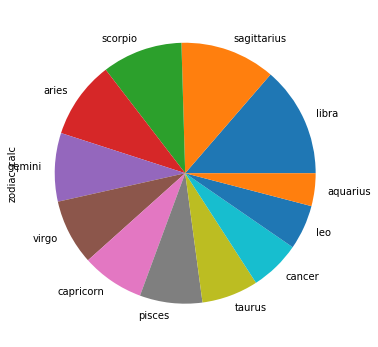

In [115]:
print("The Zodiac distribution before Normalization is :")
zodiac = data['zodiac_calc']
zodiac_count = zodiac.value_counts()
plot = zodiac_count.plot.pie(figsize=(6, 6))

The Zodiac signs with their frequencies of responses before Normalization:
libra          37
sagittarius    32
scorpio        27
aries          26
gemini         23
virgo          22
capricorn      21
pisces         21
taurus         19
cancer         17
leo            15
aquarius       11
Name: zodiac_calc, dtype: int64
Maximum number of responses is : libra 37
----------------------------------------------------------------------------------------------------
The Zodiac signs with their relative fractional weights in Zodiac Distribution in Our DataSet  after Normalization:
libra          1.0
sagittarius    1.0
scorpio        1.0
aries          1.0
gemini         1.0
virgo          1.0
capricorn      1.0
pisces         1.0
taurus         1.0
cancer         1.0
leo            1.0
aquarius       1.0
Name: zodiac_calc, dtype: float64


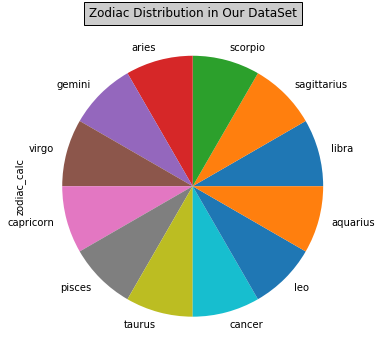

In [116]:
data['zodiac_calc'].value_counts()
graph_plot(data,"Zodiac Distribution in Our DataSet")

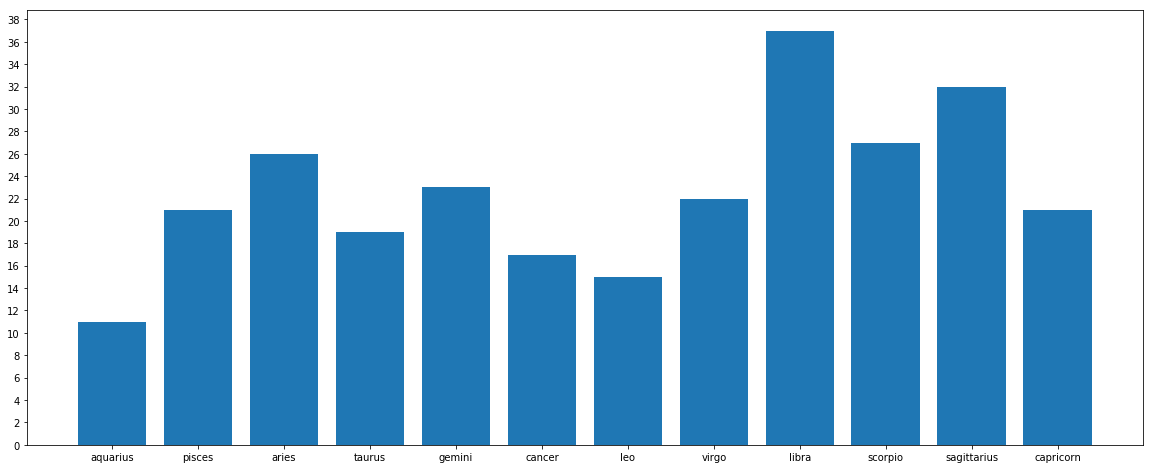

In [117]:
data['zodiac_calc'].value_counts()
bar_graph_plotter1(data,"Zodiac Distribution in Our DataSet")

In [118]:
mean_extraversion = data["extraversion"].mean()
mean_agreeableness = data["agreeableness"].mean()
mean_conscientiousness = data["conscientiousness"].mean()
mean_negative_emotionality = data["negative_emotionality"].mean()
mean_open_mindedness = data["open_mindedness"].mean()
std_extraversion = data["extraversion"].std()
std_agreeableness = data["agreeableness"].std()
std_conscientiousness = data["conscientiousness"].std()
std_negative_emotionality = data["negative_emotionality"].std()
std_open_mindedness = data["open_mindedness"].std()

In [119]:
categorise()

/home/aditi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/aditi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/aditi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/aditi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set o

In [120]:
# data

In [121]:
eh = data.loc[data['extraversion'] >= mean_extraversion]
el = data.loc[data['extraversion'] < mean_extraversion]
#eh means high extraversion and el means low extraversion ;Similarly for ah,al,ch,cl,nh,nl,oh,ol.
ah = data.loc[data['agreeableness'] >= mean_agreeableness]
al = data.loc[data['agreeableness'] < mean_agreeableness]
ch = data.loc[data['conscientiousness'] >= mean_conscientiousness]
cl = data.loc[data['conscientiousness'] < mean_conscientiousness]
nh = data.loc[data['negative_emotionality'] >= mean_negative_emotionality]
nl = data.loc[data['negative_emotionality'] < mean_negative_emotionality]
oh = data.loc[data['open_mindedness'] >= mean_open_mindedness]
ol = data.loc[data['open_mindedness'] < mean_open_mindedness]

# Domain-wise Pie charts showing the distribution of zodiac signs inside each domain normalized

The Zodiac signs with their frequencies of responses before Normalization:
sagittarius    21
libra          18
gemini         16
pisces         14
aries          13
virgo          12
scorpio        11
taurus         11
leo            10
cancer          9
capricorn       8
aquarius        7
Name: zodiac_calc, dtype: int64
Maximum number of responses is : sagittarius 21
----------------------------------------------------------------------------------------------------
The Zodiac signs with their relative fractional weights in High Agreeableness  after Normalization:
aquarius       0.636364
aries          0.500000
cancer         0.529412
capricorn      0.380952
gemini         0.695652
leo            0.666667
libra          0.486486
pisces         0.666667
sagittarius    0.656250
scorpio        0.407407
taurus         0.578947
virgo          0.545455
Name: zodiac_calc, dtype: float64
The zodiac sign with Maximum  High Agreeableness is: gemini 0.6956521739130435


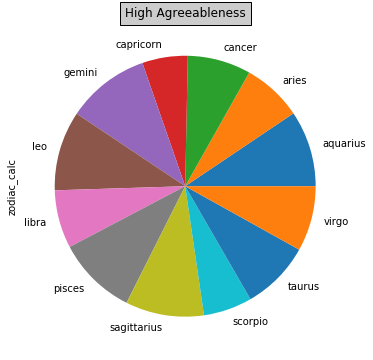

In [122]:
graph_plot(ah,'High Agreeableness')

The Zodiac signs with their frequencies of responses before Normalization:
libra          19
scorpio        16
capricorn      13
aries          13
sagittarius    11
virgo          10
taurus          8
cancer          8
pisces          7
gemini          7
leo             5
aquarius        4
Name: zodiac_calc, dtype: int64
Maximum number of responses is : libra 19
----------------------------------------------------------------------------------------------------
The Zodiac signs with their relative fractional weights in Low Agreeableness  after Normalization:
aquarius       0.363636
aries          0.500000
cancer         0.470588
capricorn      0.619048
gemini         0.304348
leo            0.333333
libra          0.513514
pisces         0.333333
sagittarius    0.343750
scorpio        0.592593
taurus         0.421053
virgo          0.454545
Name: zodiac_calc, dtype: float64
The zodiac sign with Maximum  Low Agreeableness is: capricorn 0.6190476190476191


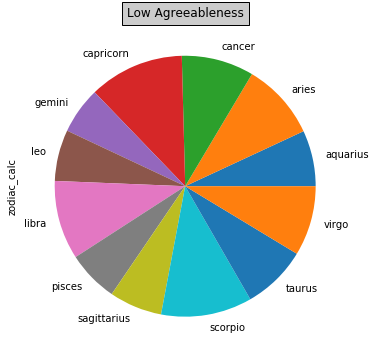

In [123]:
graph_plot(al,'Low Agreeableness')

The Zodiac signs with their frequencies of responses before Normalization:
libra          18
sagittarius    17
aries          14
taurus         13
pisces         12
gemini         11
leo            11
virgo          10
scorpio        10
capricorn       9
cancer          7
aquarius        3
Name: zodiac_calc, dtype: int64
Maximum number of responses is : libra 18
----------------------------------------------------------------------------------------------------
The Zodiac signs with their relative fractional weights in High Extraversion   after Normalization:
aquarius       0.272727
aries          0.538462
cancer         0.411765
capricorn      0.428571
gemini         0.478261
leo            0.733333
libra          0.486486
pisces         0.571429
sagittarius    0.531250
scorpio        0.370370
taurus         0.684211
virgo          0.454545
Name: zodiac_calc, dtype: float64
The zodiac sign with Maximum  High Extraversion  is: leo 0.7333333333333333


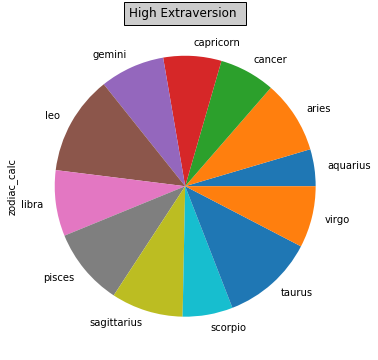

In [124]:
graph_plot(eh,"High Extraversion ")

The Zodiac signs with their frequencies of responses before Normalization:
libra          19
scorpio        17
sagittarius    15
aries          12
capricorn      12
virgo          12
gemini         12
cancer         10
pisces          9
aquarius        8
taurus          6
leo             4
Name: zodiac_calc, dtype: int64
Maximum number of responses is : libra 19
----------------------------------------------------------------------------------------------------
The Zodiac signs with their relative fractional weights in Low Extraversion  after Normalization:
aquarius       0.727273
aries          0.461538
cancer         0.588235
capricorn      0.571429
gemini         0.521739
leo            0.266667
libra          0.513514
pisces         0.428571
sagittarius    0.468750
scorpio        0.629630
taurus         0.315789
virgo          0.545455
Name: zodiac_calc, dtype: float64
The zodiac sign with Maximum  Low Extraversion is: aquarius 0.7272727272727273


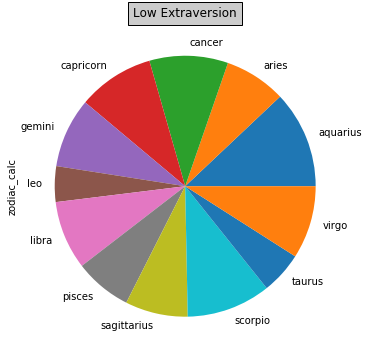

In [125]:
graph_plot(el,"Low Extraversion")

The Zodiac signs with their frequencies of responses before Normalization:
libra          21
sagittarius    15
aries          13
virgo          13
gemini         13
scorpio        11
pisces         10
taurus         10
leo             6
cancer          6
capricorn       5
aquarius        4
Name: zodiac_calc, dtype: int64
Maximum number of responses is : libra 21
----------------------------------------------------------------------------------------------------
The Zodiac signs with their relative fractional weights in High Conscientiousness  after Normalization:
aquarius       0.363636
aries          0.500000
cancer         0.352941
capricorn      0.238095
gemini         0.565217
leo            0.400000
libra          0.567568
pisces         0.476190
sagittarius    0.468750
scorpio        0.407407
taurus         0.526316
virgo          0.590909
Name: zodiac_calc, dtype: float64
The zodiac sign with Maximum  High Conscientiousness is: virgo 0.5909090909090909


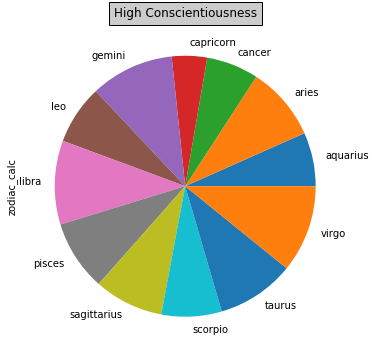

In [126]:
graph_plot(ch,'High Conscientiousness')

The Zodiac signs with their frequencies of responses before Normalization:
sagittarius    17
capricorn      16
scorpio        16
libra          16
aries          13
pisces         11
cancer         11
gemini         10
leo             9
virgo           9
taurus          9
aquarius        7
Name: zodiac_calc, dtype: int64
Maximum number of responses is : sagittarius 17
----------------------------------------------------------------------------------------------------
The Zodiac signs with their relative fractional weights in Low Conscientiousness  after Normalization:
aquarius       0.636364
aries          0.500000
cancer         0.647059
capricorn      0.761905
gemini         0.434783
leo            0.600000
libra          0.432432
pisces         0.523810
sagittarius    0.531250
scorpio        0.592593
taurus         0.473684
virgo          0.409091
Name: zodiac_calc, dtype: float64
The zodiac sign with Maximum  Low Conscientiousness is: capricorn 0.7619047619047619


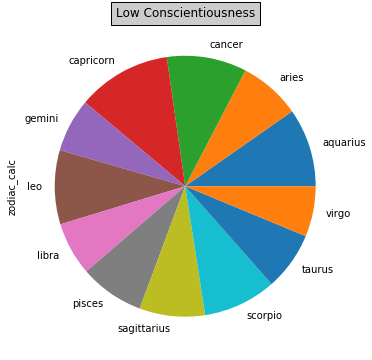

In [127]:
graph_plot(cl,'Low Conscientiousness')

The Zodiac signs with their frequencies of responses before Normalization:
libra          15
sagittarius    14
scorpio        14
pisces         13
aries          12
capricorn      12
gemini         11
leo            11
virgo          10
cancer          9
aquarius        8
taurus          6
Name: zodiac_calc, dtype: int64
Maximum number of responses is : libra 15
----------------------------------------------------------------------------------------------------
The Zodiac signs with their relative fractional weights in High Negative Emotionality  after Normalization:
aquarius       0.727273
aries          0.461538
cancer         0.529412
capricorn      0.571429
gemini         0.478261
leo            0.733333
libra          0.405405
pisces         0.619048
sagittarius    0.437500
scorpio        0.518519
taurus         0.315789
virgo          0.454545
Name: zodiac_calc, dtype: float64
The zodiac sign with Maximum  High Negative Emotionality is: leo 0.7333333333333333


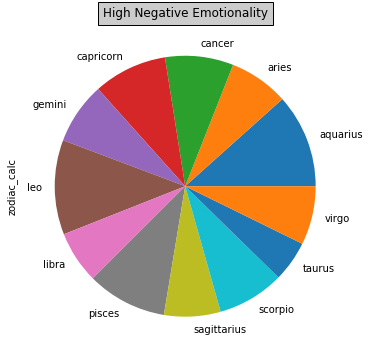

In [128]:
graph_plot(nh,'High Negative Emotionality')

The Zodiac signs with their frequencies of responses before Normalization:
libra          22
sagittarius    18
aries          14
scorpio        13
taurus         13
virgo          12
gemini         12
capricorn       9
pisces          8
cancer          8
leo             4
aquarius        3
Name: zodiac_calc, dtype: int64
Maximum number of responses is : libra 22
----------------------------------------------------------------------------------------------------
The Zodiac signs with their relative fractional weights in Low Negative Emotionality  after Normalization:
aquarius       0.272727
aries          0.538462
cancer         0.470588
capricorn      0.428571
gemini         0.521739
leo            0.266667
libra          0.594595
pisces         0.380952
sagittarius    0.562500
scorpio        0.481481
taurus         0.684211
virgo          0.545455
Name: zodiac_calc, dtype: float64
The zodiac sign with Maximum  Low Negative Emotionality is: taurus 0.6842105263157895


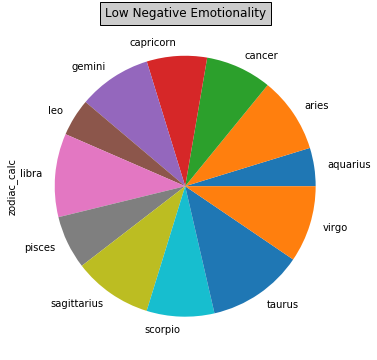

In [129]:
graph_plot(nl,'Low Negative Emotionality')

The Zodiac signs with their frequencies of responses before Normalization:
sagittarius    18
libra          18
virgo          16
scorpio        14
aries          14
gemini         13
taurus         10
capricorn       9
cancer          7
pisces          5
leo             5
aquarius        2
Name: zodiac_calc, dtype: int64
Maximum number of responses is : sagittarius 18
----------------------------------------------------------------------------------------------------
The Zodiac signs with their relative fractional weights in High Open Mindedness  after Normalization:
aquarius       0.181818
aries          0.538462
cancer         0.411765
capricorn      0.428571
gemini         0.565217
leo            0.333333
libra          0.486486
pisces         0.238095
sagittarius    0.562500
scorpio        0.518519
taurus         0.526316
virgo          0.727273
Name: zodiac_calc, dtype: float64
The zodiac sign with Maximum  High Open Mindedness is: virgo 0.7272727272727273


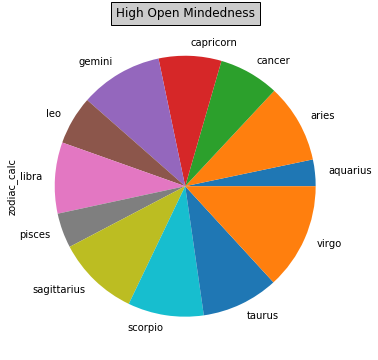

In [130]:
graph_plot(oh,"High Open Mindedness")

The Zodiac signs with their frequencies of responses before Normalization:
libra          19
pisces         16
sagittarius    14
scorpio        13
aries          12
capricorn      12
gemini         10
cancer         10
leo            10
aquarius        9
taurus          9
virgo           6
Name: zodiac_calc, dtype: int64
Maximum number of responses is : libra 19
----------------------------------------------------------------------------------------------------
The Zodiac signs with their relative fractional weights in Low Open Mindedness  after Normalization:
aquarius       0.818182
aries          0.461538
cancer         0.588235
capricorn      0.571429
gemini         0.434783
leo            0.666667
libra          0.513514
pisces         0.761905
sagittarius    0.437500
scorpio        0.481481
taurus         0.473684
virgo          0.272727
Name: zodiac_calc, dtype: float64
The zodiac sign with Maximum  Low Open Mindedness is: aquarius 0.8181818181818182


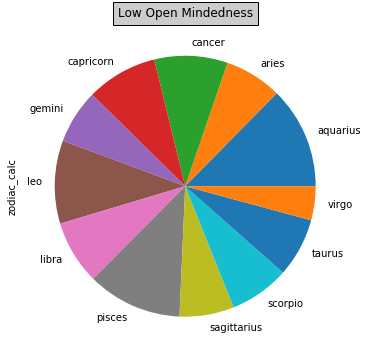

In [131]:
graph_plot(ol,"Low Open Mindedness")

In [132]:
pisces = data.loc[data['zodiac_calc'] == 'pisces']
pisces.reset_index()
aries = data.loc[data['zodiac_calc'] == 'aries']
aries.reset_index()
taurus = data.loc[data['zodiac_calc'] == 'taurus']
taurus.reset_index()
gemini = data.loc[data['zodiac_calc'] == 'gemini']
gemini.reset_index()
libra = data.loc[data['zodiac_calc'] == 'libra']
libra.reset_index()
sagittarius = data.loc[data['zodiac_calc'] == 'sagittarius']
sagittarius.reset_index()
virgo = data.loc[data['zodiac_calc'] == 'virgo']
virgo.reset_index()
aquarius= data.loc[data['zodiac_calc'] == 'aquarius']
aquarius.reset_index()
scorpio= data.loc[data['zodiac_calc'] == 'scorpio']
scorpio.reset_index()
leo = data.loc[data['zodiac_calc'] == 'leo']
leo.reset_index()
cancer=data.loc[data['zodiac_calc'] == 'cancer']
cancer.reset_index()
capricorn= data.loc[data['zodiac_calc'] == 'capricorn']
capricorn.reset_index()

sign_list=['pisces','aries','taurus','gemini','libra','sagittarius','virgo','aquarius','scorpio','leo','cancer','capricorn']
sign_list_vals=[pisces,aries,taurus,gemini,libra,sagittarius,virgo,aquarius,scorpio,leo,cancer,capricorn]

# Zodiac-wise Pie charts showing the distribution of the behavior of people having a particular zodiac sign (Categorising based on the deviation from the mean value)

In [133]:
attri=['e1','a1','c1','n1','o1']
result_of=['introvert','extraversion','non-agreeable','agreeableness','non-conscientious','conscientiousness','positive-emotionality','negative_emotionality','close mind','open_mindedness']
cnt=-1
pie_chart=[]
for j in sign_list_vals:
    op=[]
    cnt+=1
    for i in range(len(attri)):

        pisces1=j[attri[i]]
        my_count = pisces1.value_counts()
        op.append(my_count[0])
        op.append(my_count[1])
        

    pie_chart.append(op)

In [134]:
def graph_plotter_zodiac(pc,res_of,sgnlst):
    plt.title(sgnlst, bbox={'facecolor':'0.8', 'pad':5})
#     plt.title(sgnlst)
    plt.pie(pc, labels=res_of, startangle=90, autopct='%.1f%%', radius=2)   
    plt.show()

In [135]:
# #bar graph
# def bar_graph_plotter_zodiac(pc,res_of,sgnlst):
#     plt.figure(figsize=(20, 8))
#     plt.xlabel=('Domains')
#     plt.ylabel=('Number of Students')
    
#     axes = plt.gca()
#     org_cnt=original_counts[sgnlst]
#     #axes.set_xlim([x,xmax])
#     axes.set_ylim([0,org_cnt+1])
    
#     plt.yticks(np.arange(0, org_cnt+1, 1))
#     q=[]
#     v=[]
#     for i in range(0,10,2):
#         q.append(pc[i])
#         v.append(res_of[i])
#     plt.title(sgnlst)

#     plt.bar(v,q)
#     plt.show

In [136]:
def bar_graph_plotter_zodiac(pc,res_of,sgnlst):
    plt.figure(figsize=(20, 8))
#     plt.xlabel=('attributes')
#     plt.ylabel=('No. of People')
    
#     print pc
    axes = plt.gca()
    org_cnt=original_counts[sgnlst]
    #axes.set_xlim([x,xmax])
    axes.set_ylim([0,org_cnt+1])
    width = 0.35 
    plt.yticks(np.arange(0, org_cnt+1, 1))
    q=[]
    v=[]
    r=[]
    for i in range(0,10,2):
        q.append(pc[i])
        r.append(pc[i+1])
        v.append(res_of[i])
    plt.title(sgnlst)

    plt.bar(v,q,width)
    plt.bar(v,r,width,bottom=q)
    plt.show

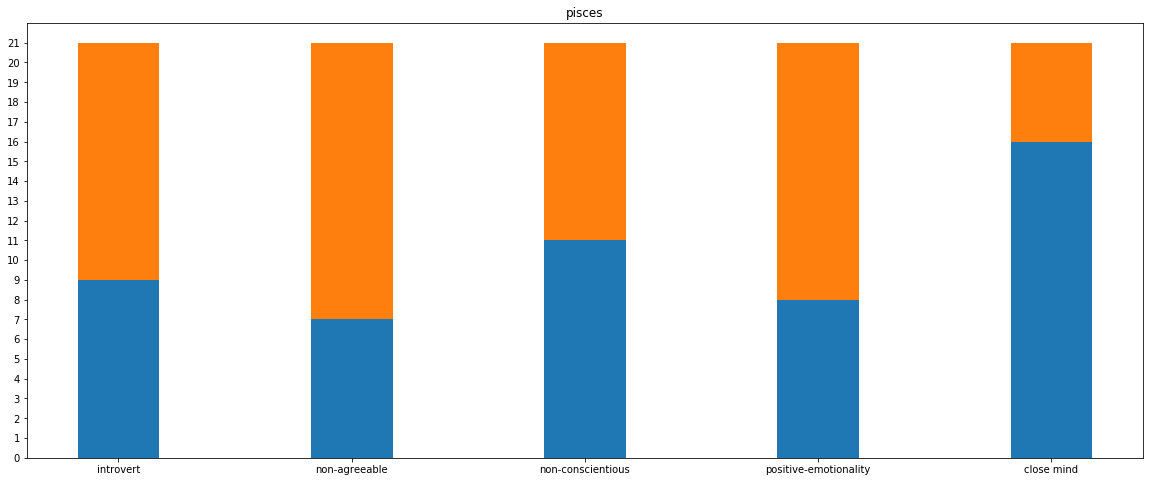

In [137]:
bar_graph_plotter_zodiac(pie_chart[0],result_of,sign_list[0])

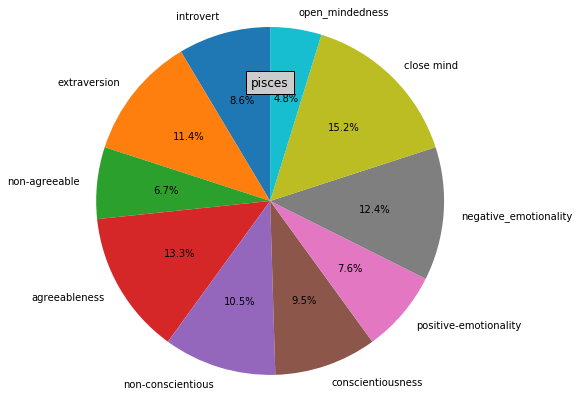

In [138]:
graph_plotter_zodiac(pie_chart[0],result_of,sign_list[0])

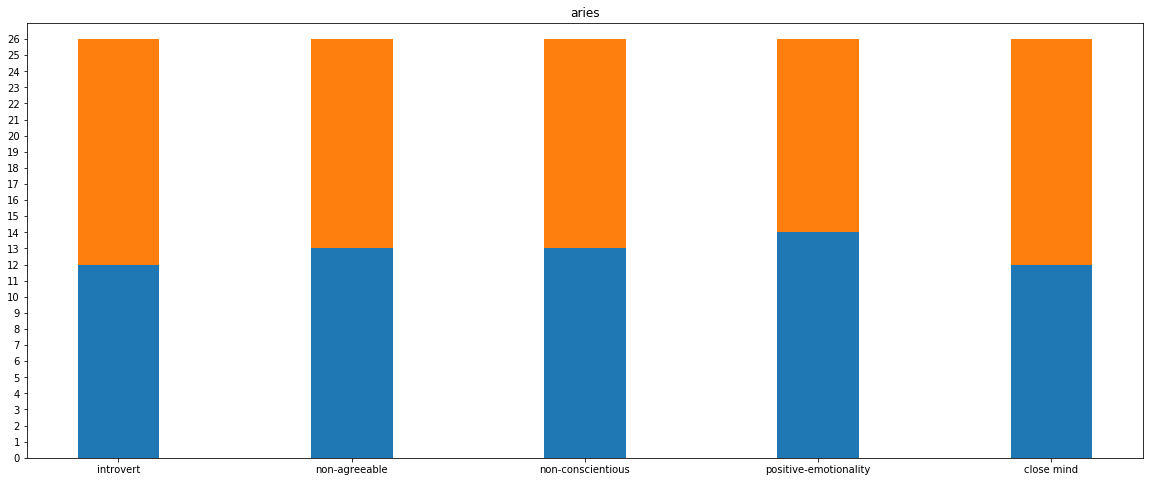

In [139]:
bar_graph_plotter_zodiac(pie_chart[1],result_of,sign_list[1])

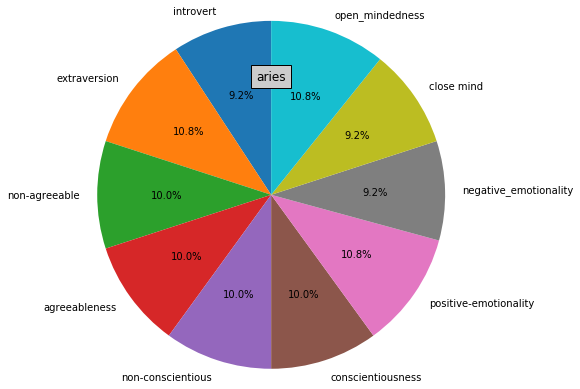

In [140]:
graph_plotter_zodiac(pie_chart[1],result_of,sign_list[1])

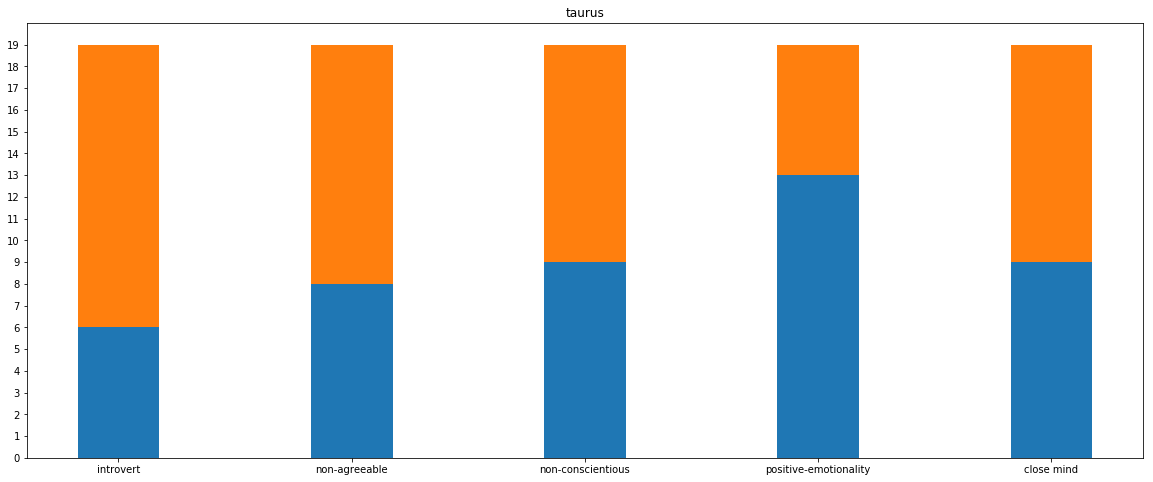

In [141]:
bar_graph_plotter_zodiac(pie_chart[2],result_of,sign_list[2])

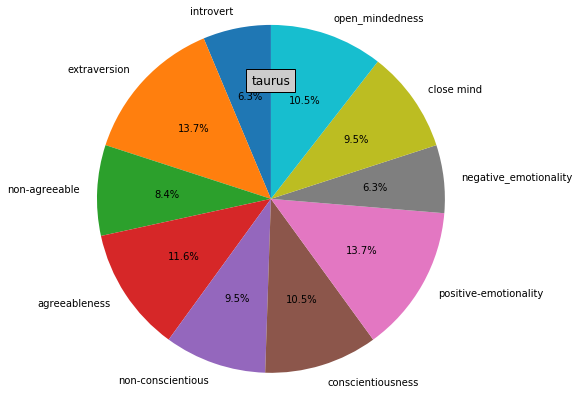

In [142]:
graph_plotter_zodiac(pie_chart[2],result_of,sign_list[2])

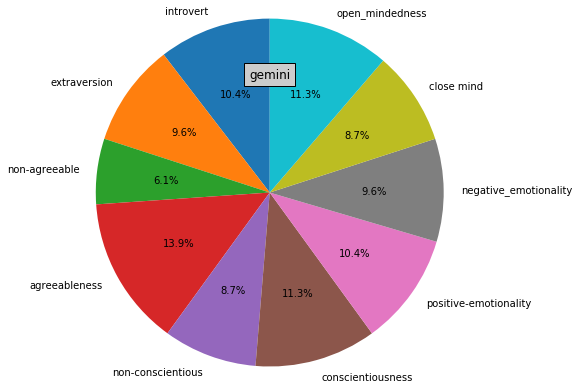

In [143]:
graph_plotter_zodiac(pie_chart[3],result_of,sign_list[3])

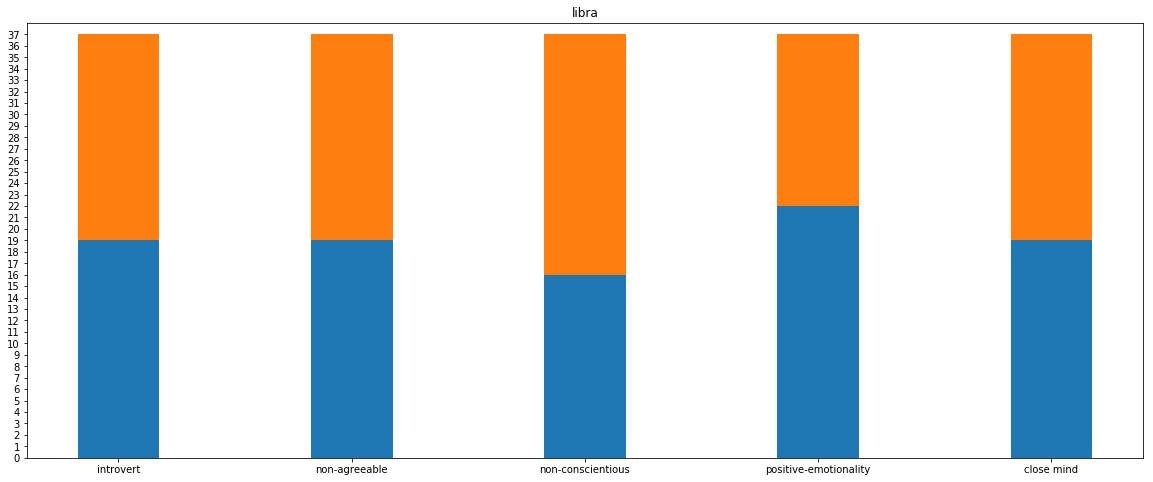

In [144]:
bar_graph_plotter_zodiac(pie_chart[4],result_of,sign_list[4])

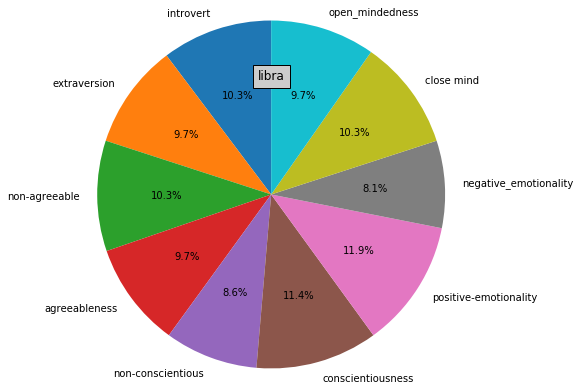

In [145]:
graph_plotter_zodiac(pie_chart[4],result_of,sign_list[4])

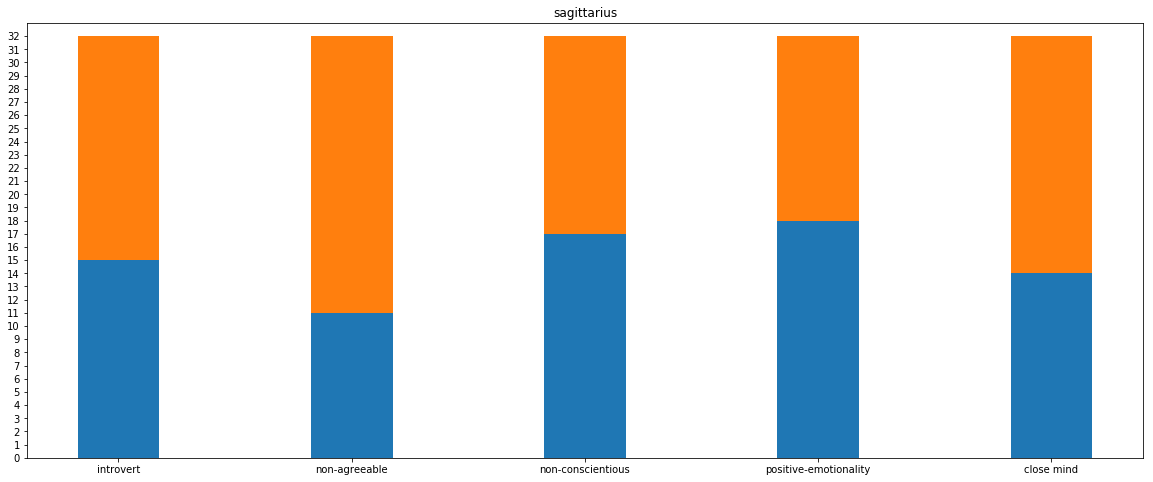

In [146]:
bar_graph_plotter_zodiac(pie_chart[5],result_of,sign_list[5])

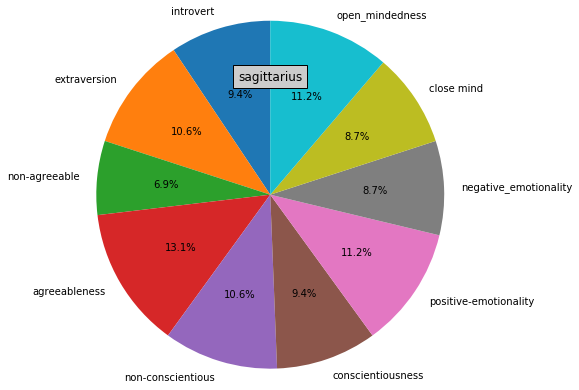

In [147]:
graph_plotter_zodiac(pie_chart[5],result_of,sign_list[5])

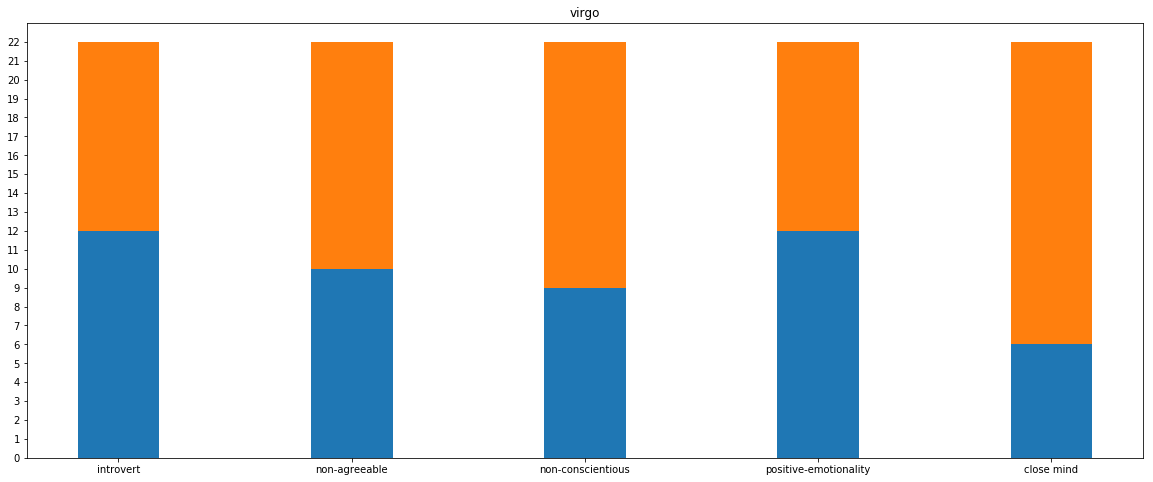

In [148]:
bar_graph_plotter_zodiac(pie_chart[6],result_of,sign_list[6])

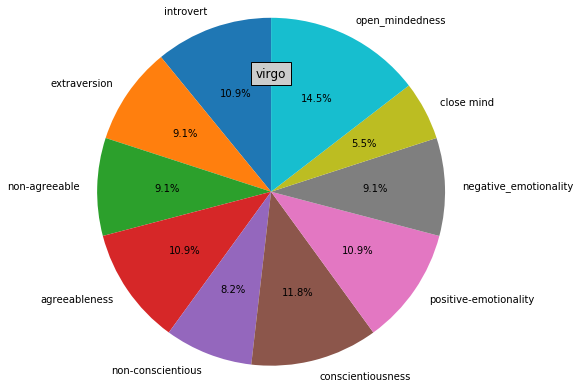

In [149]:
graph_plotter_zodiac(pie_chart[6],result_of,sign_list[6])

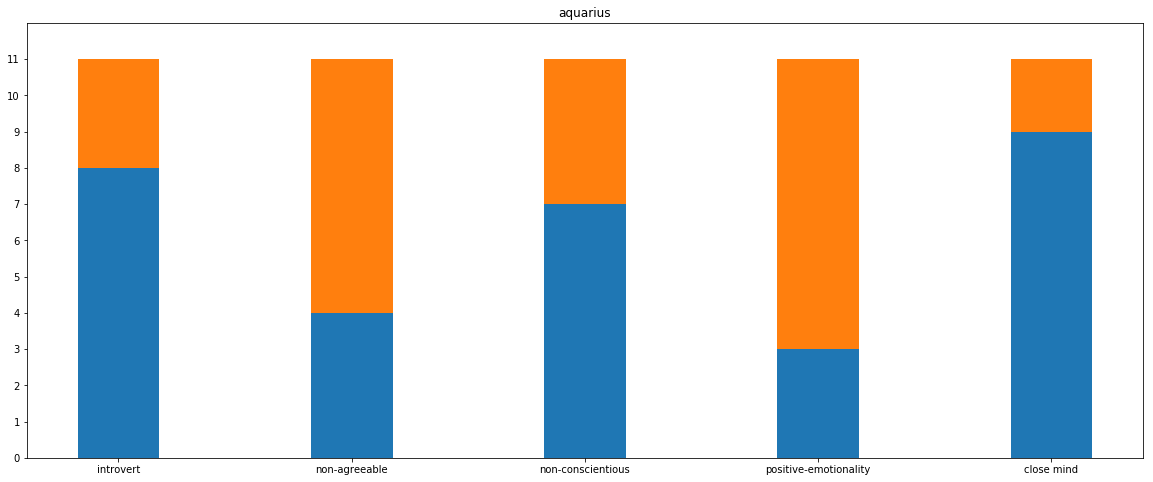

In [150]:
bar_graph_plotter_zodiac(pie_chart[7],result_of,sign_list[7])

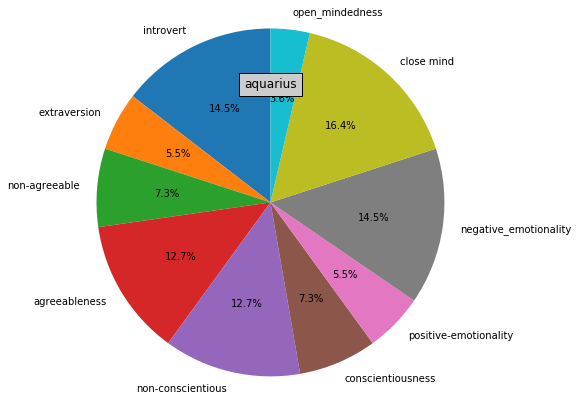

In [151]:
graph_plotter_zodiac(pie_chart[7],result_of,sign_list[7])

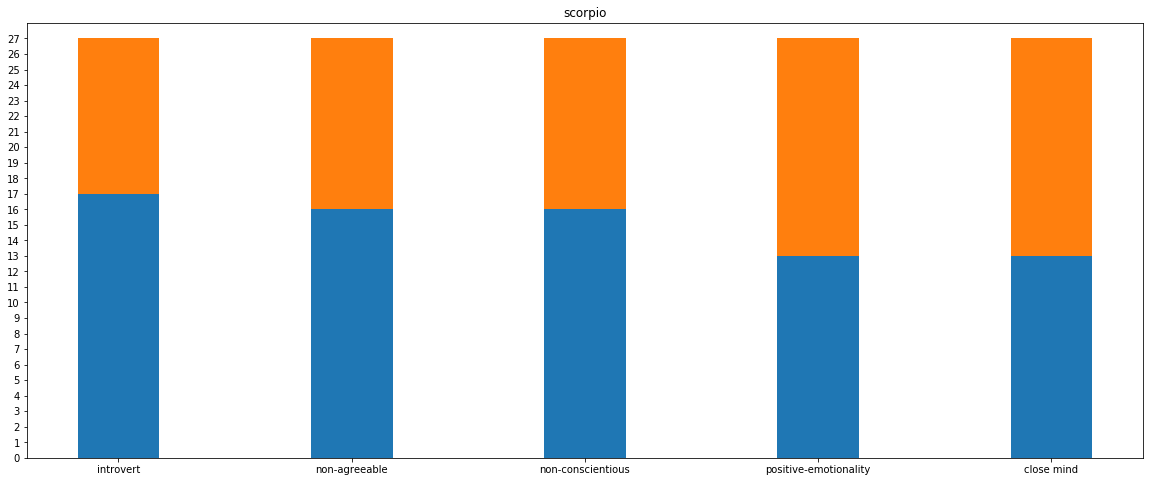

In [152]:
bar_graph_plotter_zodiac(pie_chart[8],result_of,sign_list[8])

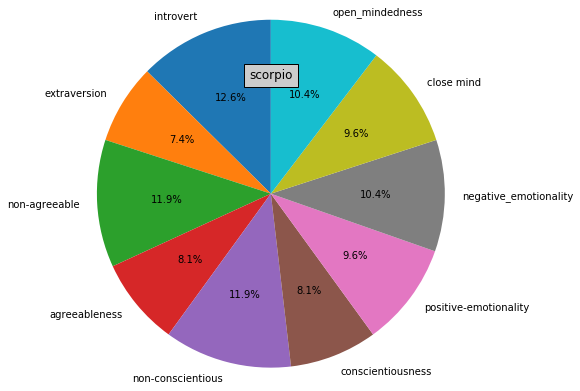

In [153]:
graph_plotter_zodiac(pie_chart[8],result_of,sign_list[8])

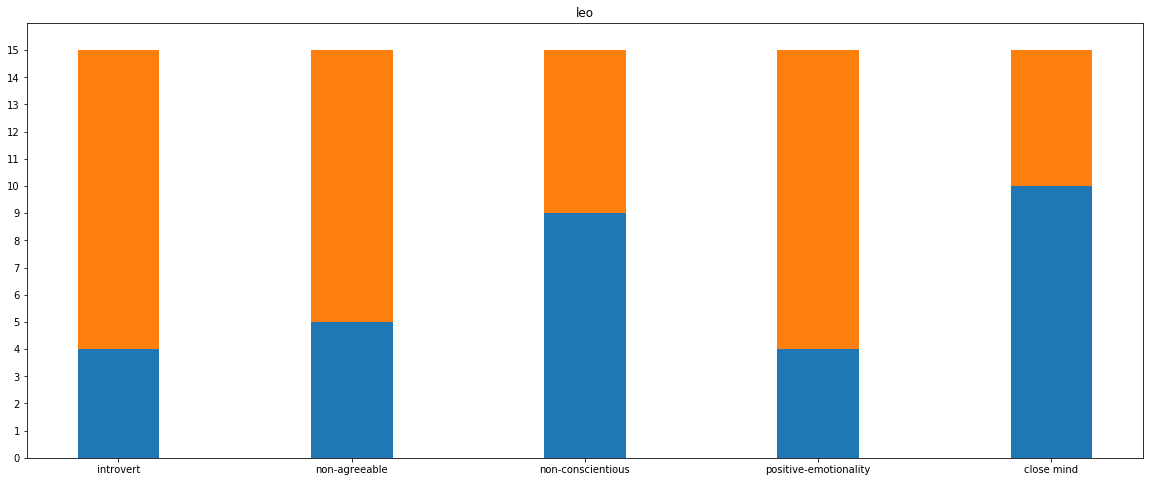

In [154]:
bar_graph_plotter_zodiac(pie_chart[9],result_of,sign_list[9])

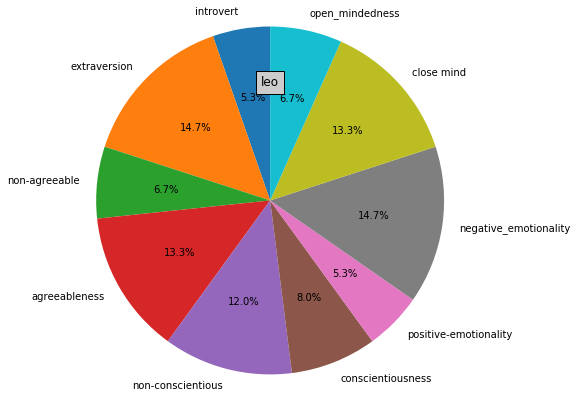

In [155]:
graph_plotter_zodiac(pie_chart[9],result_of,sign_list[9])

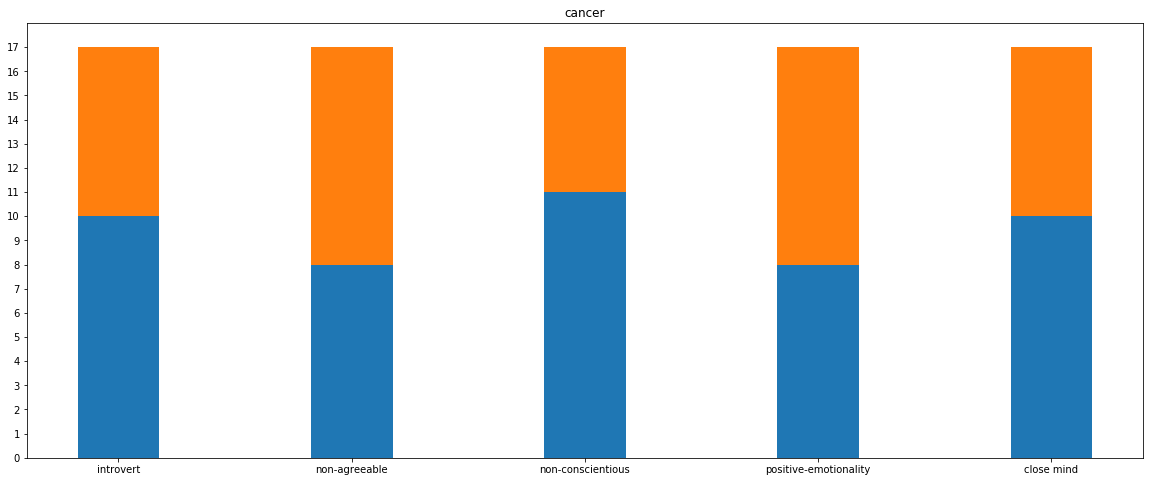

In [156]:
bar_graph_plotter_zodiac(pie_chart[10],result_of,sign_list[10])

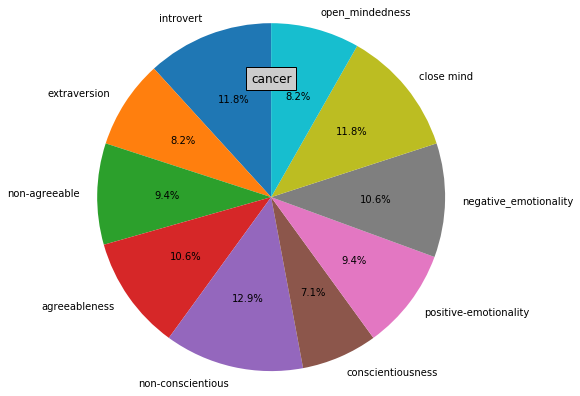

In [157]:
graph_plotter_zodiac(pie_chart[10],result_of,sign_list[10])

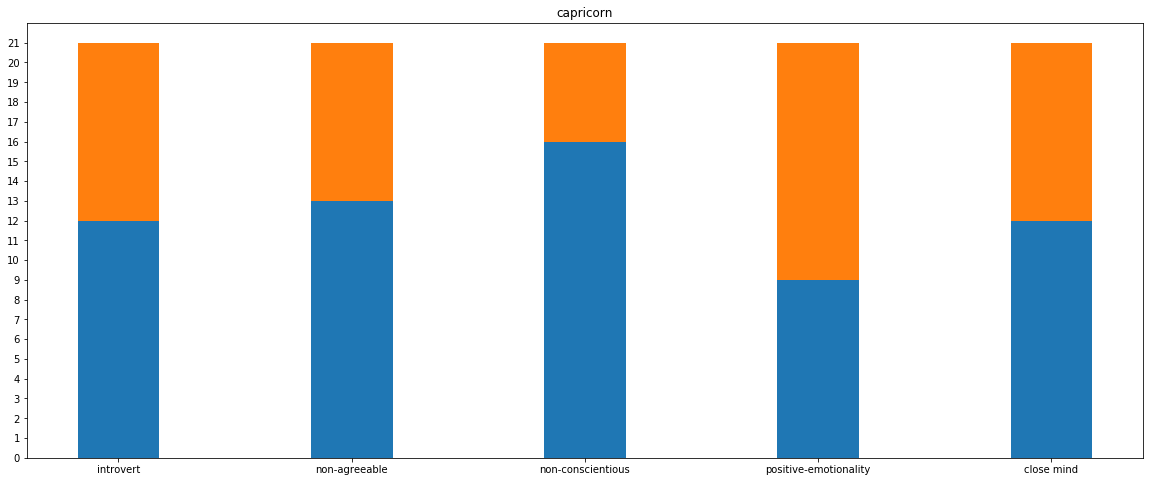

In [158]:
bar_graph_plotter_zodiac(pie_chart[11],result_of,sign_list[11])

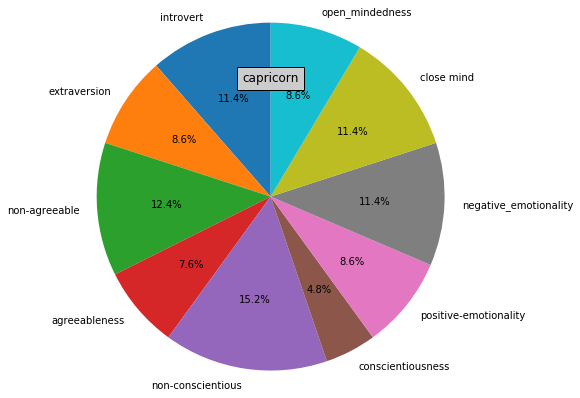

In [159]:
graph_plotter_zodiac(pie_chart[11],result_of,sign_list[11])

# Zodiac-wise Pie charts showing the distribution of the behavior of people having a particular zodiac sign (Categorising with consideration of only points that are prominent(i.e. greater than mean+std. dev or less than mean- std. dev))

In [161]:
attri=['e2','a2','c2','n2','o2']
result_of=['introvert','extraversion','non-agreeable','agreeableness','non-conscientious','conscientiousness','positive-emotionality','negative_emotionality','close mind','open_mindedness']
cnt=-1
pie_chart=[]
for j in sign_list_vals:
    opx=[]
    cnt+=1
    for i in range(len(attri)):

        pisces1=j[attri[i]]
        my_count = pisces1.value_counts()
        if(0 in my_count.index):
            opx.append(my_count[0])
        else:
            opx.append(0)
        
        if(1 in my_count.index):
            opx.append(my_count[1])
        else:
            opx.append(0)
        if(2 in my_count.index):
            opx.append(my_count[2])
        else:
            opx.append(0)
#     print (opx)
    pie_chart.append(opx)

In [162]:
# pie_chart

In [165]:
def stacked_bar_plotter(pc,res_of,sgnlst):
    plt.figure(figsize=(20, 8))
    
    q=[]
    r=[]
    s=[]
    v=[]
    for i in range(0,15,3):
        q.append(pc[i])
        r.append(pc[i+1])
        s.append(pc[i+2])
        
    for i in range(0,10,2):
        v.append(res_of[i])
        



   
   
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(v, q, width)
    p2 = plt.bar(v, r, width, bottom=q)
    p3=plt.bar(v,s,width, bottom=np.array(q)+np.array(r))

#     plt.ylabel('No of people')
    plt.title(sgnlst)
    # plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
    plt.yticks(np.arange(0, q[0]+r[0]+s[0]+1, 1))
    # plt.legend((p1[0], p2[0]), ('Men', 'Women'))

    plt.show()

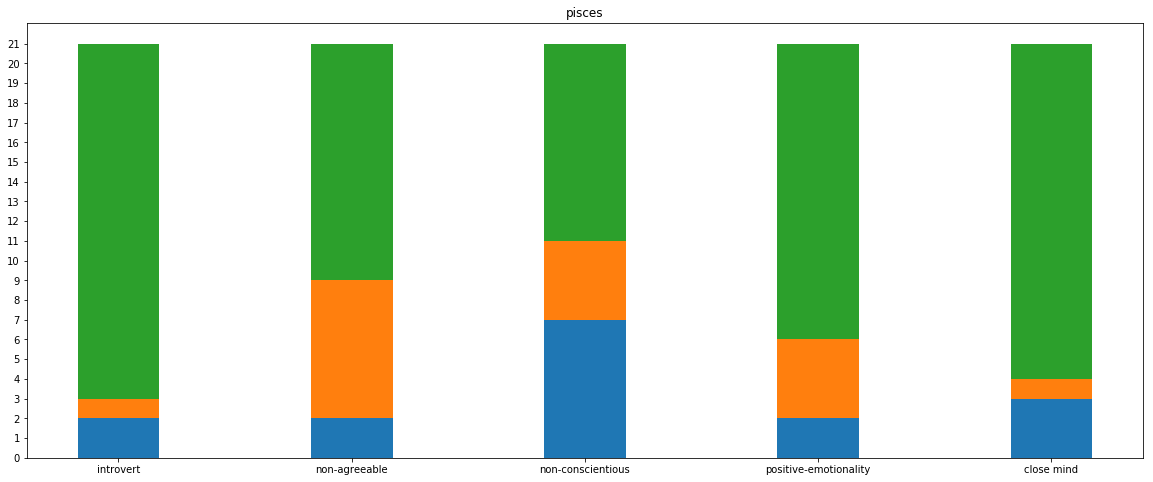

In [166]:
stacked_bar_plotter(pie_chart[0],result_of,sign_list[0])

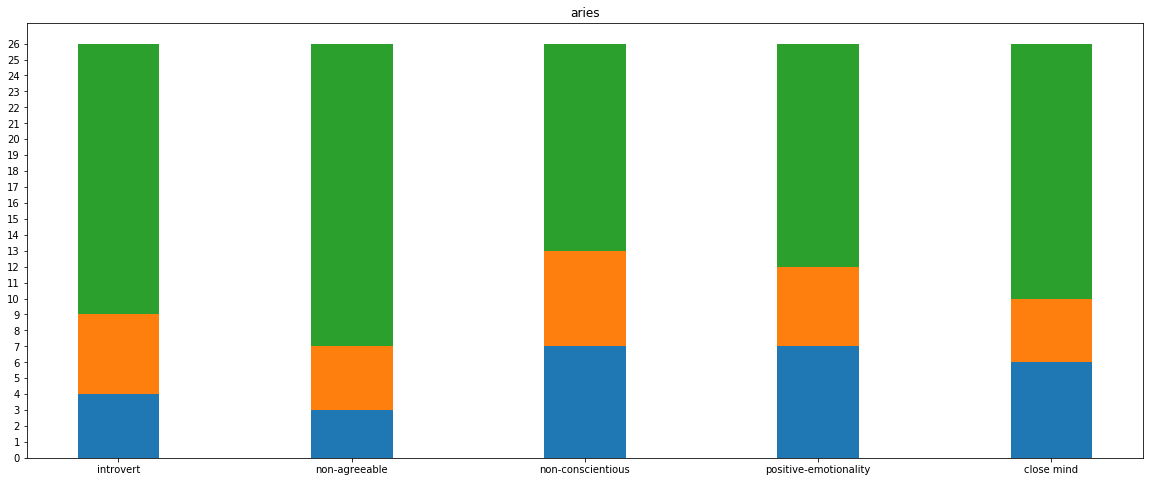

In [168]:
stacked_bar_plotter(pie_chart[1],result_of,sign_list[1])

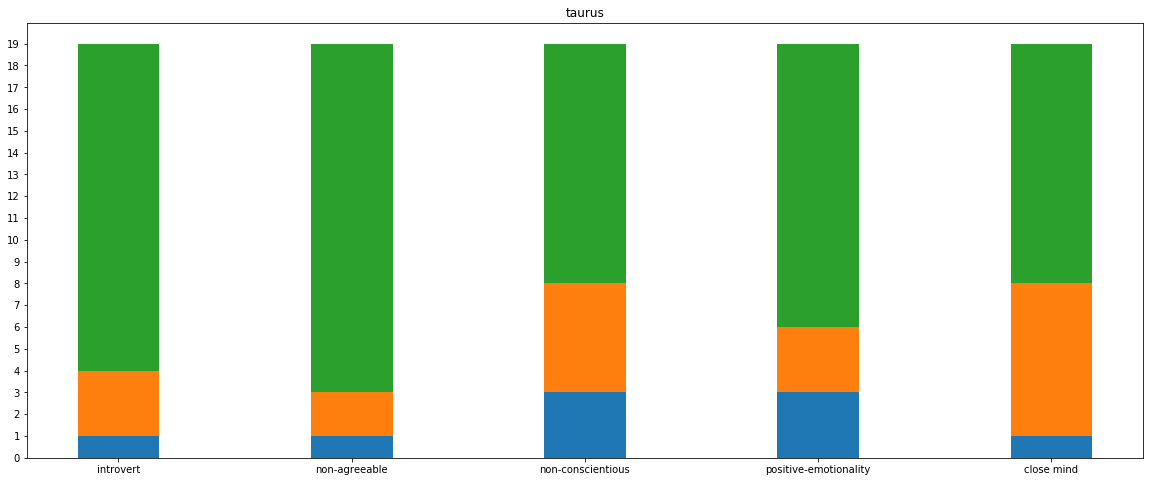

In [169]:
stacked_bar_plotter(pie_chart[2],result_of,sign_list[2])

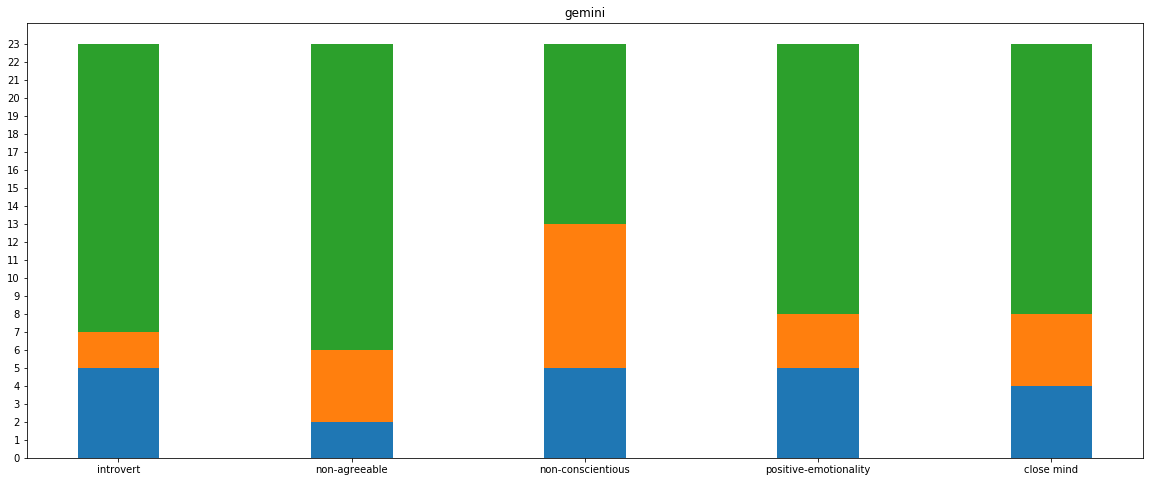

In [170]:
stacked_bar_plotter(pie_chart[3],result_of,sign_list[3])

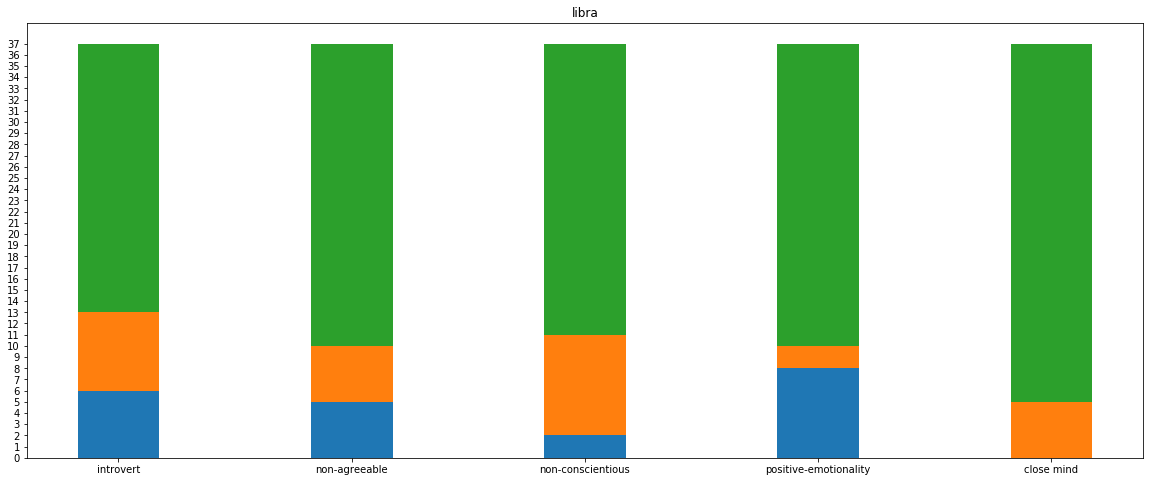

In [171]:
stacked_bar_plotter(pie_chart[4],result_of,sign_list[4])

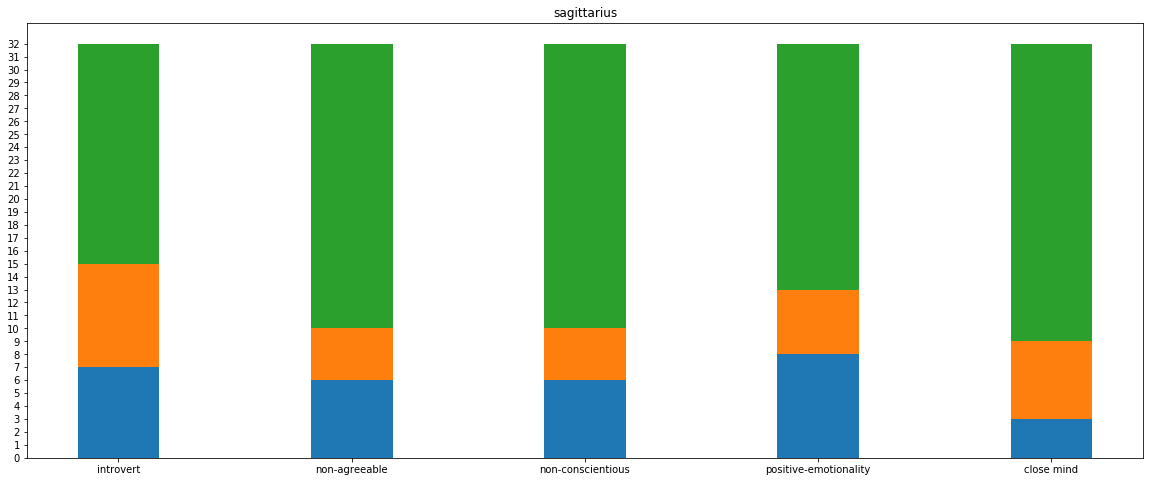

In [172]:
stacked_bar_plotter(pie_chart[5],result_of,sign_list[5])

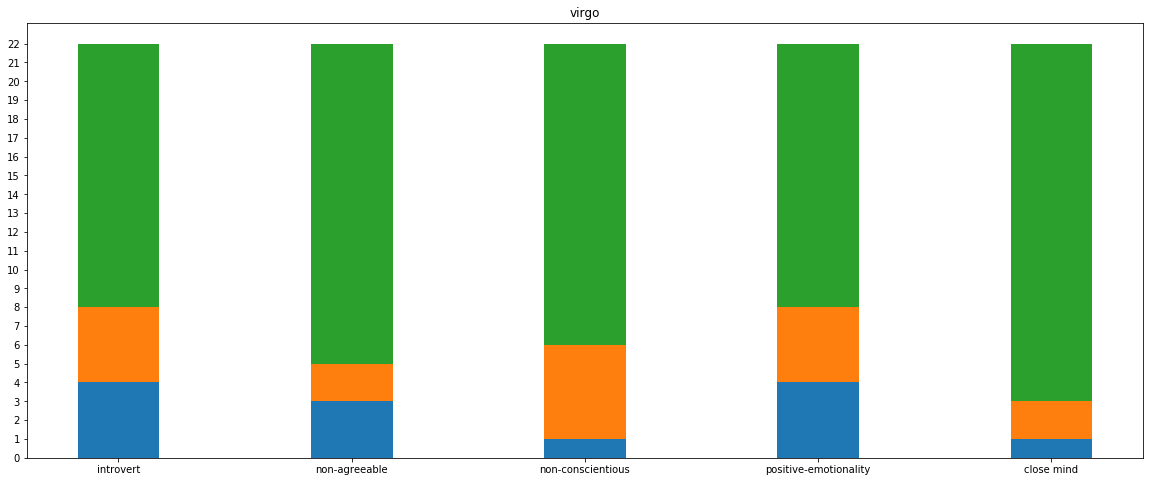

In [173]:
stacked_bar_plotter(pie_chart[6],result_of,sign_list[6])

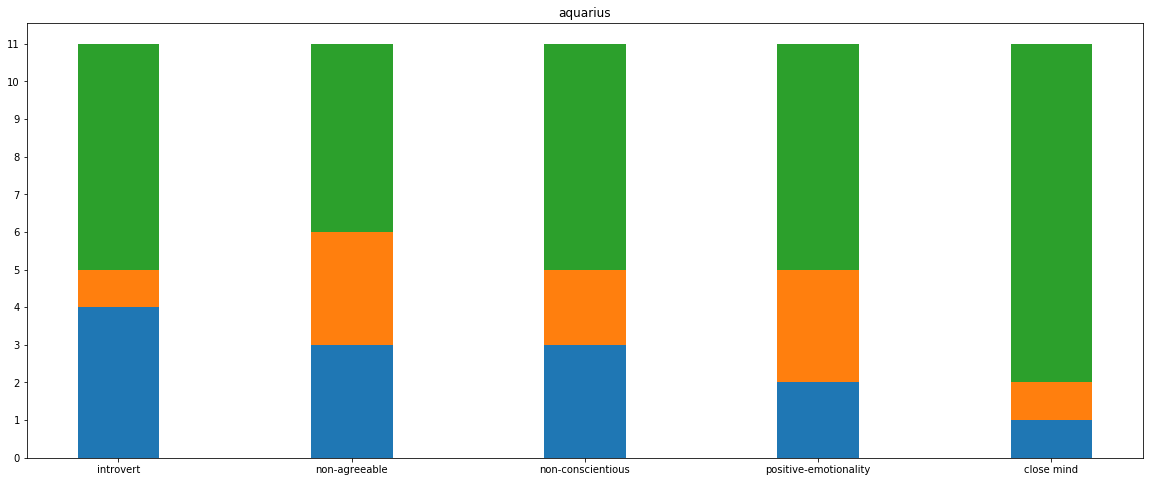

In [174]:
stacked_bar_plotter(pie_chart[7],result_of,sign_list[7])

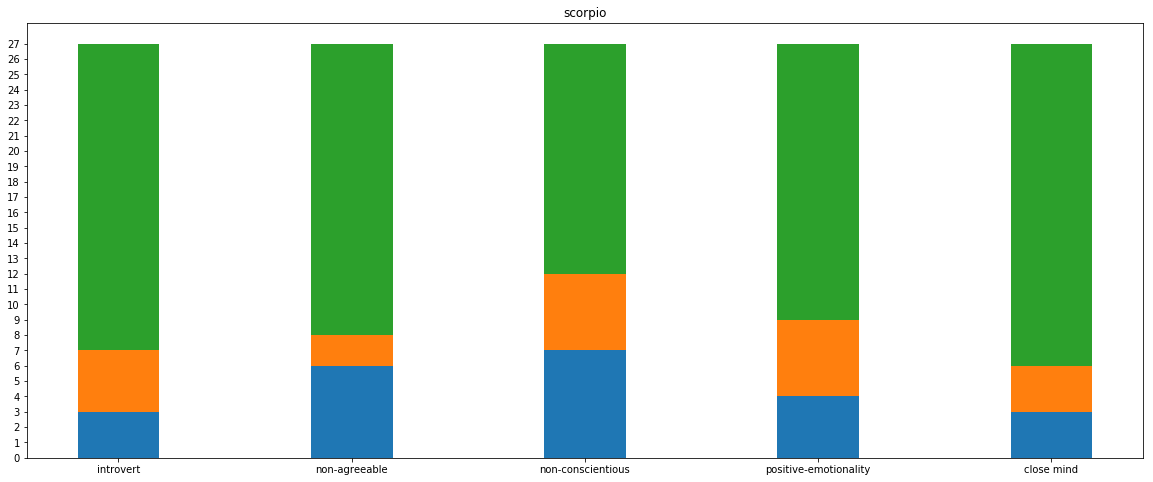

In [175]:
stacked_bar_plotter(pie_chart[8],result_of,sign_list[8])

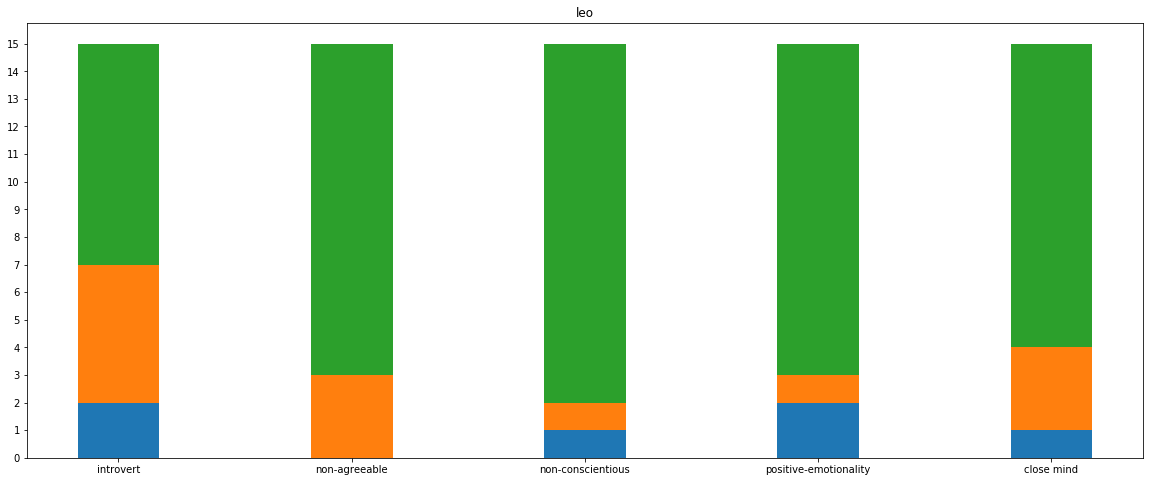

In [176]:
stacked_bar_plotter(pie_chart[9],result_of,sign_list[9])

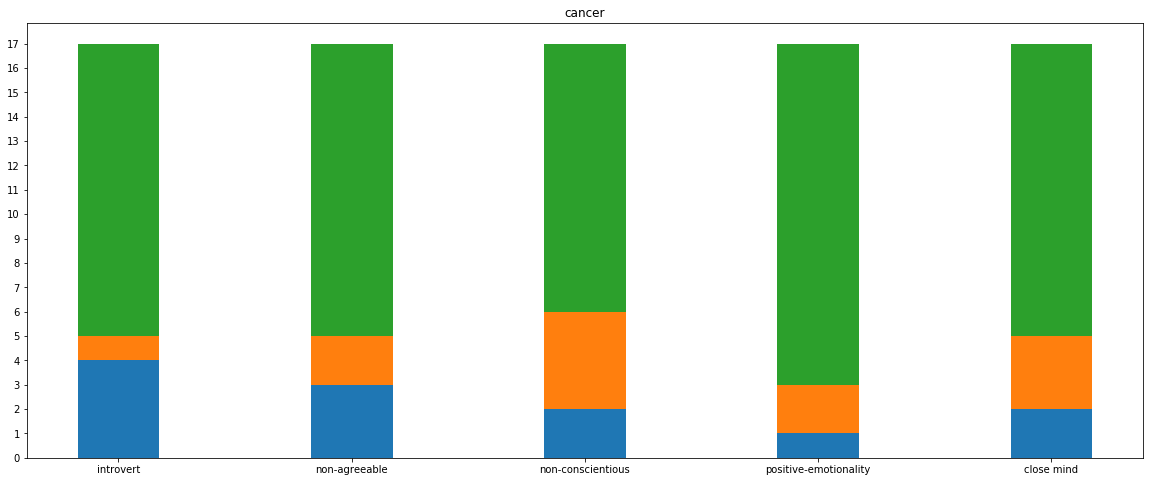

In [177]:
stacked_bar_plotter(pie_chart[10],result_of,sign_list[10])

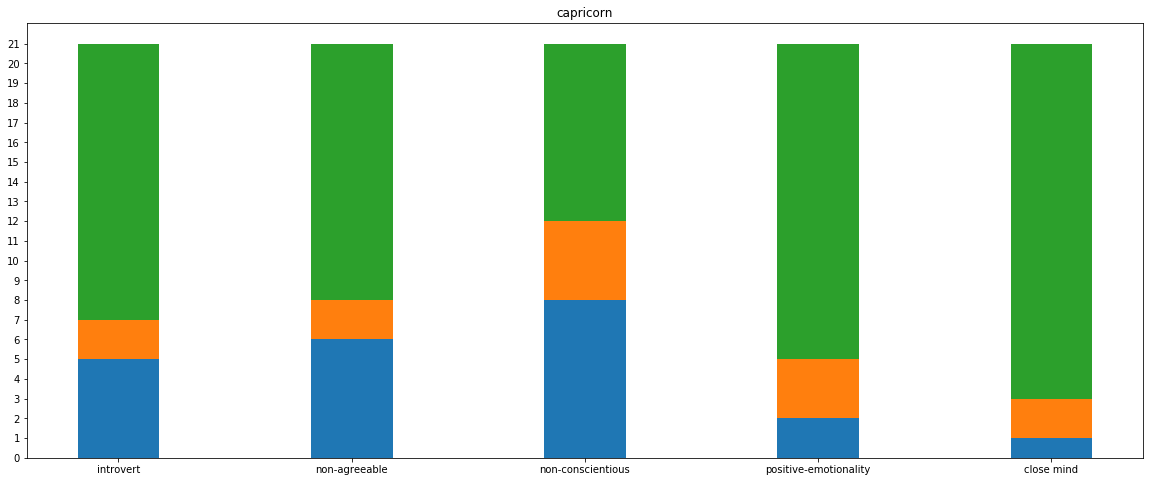

In [178]:
stacked_bar_plotter(pie_chart[11],result_of,sign_list[11])

******************************************************************************************************************